[0.3049511756683621, 0.3015976934629407, 0.29858087767822683, 0.2958487026282896, 0.29335731112830493, 0.29106973137433806, 0.28895479538022156, 0.2869862273102094, 0.28514187501956345, 0.28340306230745255, 0.281754042920235, 0.2801815403218078, 0.27867435975842003, 0.27722306126167473, 0.275819684017328, 0.2744575140311597, 0.27313088829065646, 0.27183502968961043, 0.2705659078832873, 0.269320122000892, 0.2680948017819122, 0.26688752424224965, 0.2656962434306624, 0.2645192312192479, 0.2633550273946972, 0.2622023975893242, 0.2610602978203682, 0.2599278445995194, 0.25880428973767716, 0.2576889991073955, 0.25658143474133116, 0.25548113974266046, 0.25438772556575207, 0.25330086129476864, 0.2522202646063531, 0.2511456941518613, 0.25007694313615003, 0.24901383390496531, 0.24795621338249318, 0.24690394922552922, 0.24585692658169647, 0.24481504535682752, 0.24377821791152737, 0.24274636711950293, 0.24171942473082952, 0.24069732999225504, 0.23968002848416603, 0.23866747114018133, 0.237659613420

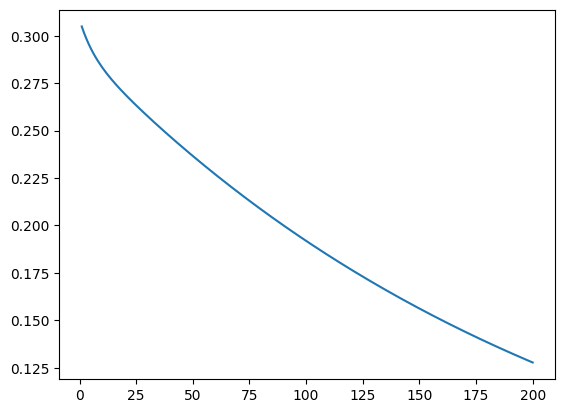

[0.326405   0.32697455 0.3275441  ... 0.9282163  0.92878585 0.92935541]


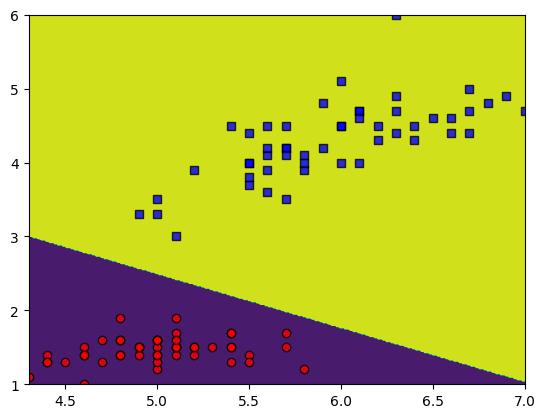

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from matplotlib.colors import ListedColormap

class AdalineGD:
    def __init__(self , eta=0.1, num_iter=50, random_state=1):
        self.eta = eta
        self.num_iter = num_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.1, size=X.shape[1]) 
        self.b_ = np.float_()

        self.losses_ = []




        for i in range(self.num_iter):
            net_input =  self.net_input(X)
            output =  self.activation(net_input)
            errors = (output - y )


            self.w_ -= self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ -= self.eta * 2.0 * errors.mean()


            loss = (errors ** 2).mean()

            self.losses_.append(loss)

        print(self.losses_)
        return self
    
    def predict(self, X):
        print(self.activation(self.net_input(X)))     

        return np.where(self.activation(self.net_input(X))>= 0.5, 1, 0)

            
    def net_input(self, X):
        return np.dot(X , self.w_) + self.b_

    def activation(self , X):
        return X
    



def plot_decision_regions(X, Y, classifier, n_items=0.02):
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique([1,0]))])
    
    x1_min , x1_max = min(X[:, 0]) , max(X[:,0]) 
    x2_min , x2_max = min(X[:, 1]) , max(X[:,1]) 

    xx1 , xx2 = np.meshgrid( 
        np.linspace(x1_min , x1_max, n_items),
        np.linspace(x2_min , x2_max, n_items)
    )

    lab = classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T )


    lab = lab.reshape(xx1.shape)


    plt.contourf(xx1, xx2,  lab)


    for idx, cl in enumerate(np.unique(y)):
        XCL = np.array([])
        for id, row  in enumerate(X) :
            if y[id] == cl:
                if len(XCL)==0:
                    XCL= np.array([row])
                else:
                    XCL = np.insert(XCL, len(XCL) , row  , axis=0 )

        

        plt.scatter(x= np.array(XCL[:, 0]),
                    y=np.array(XCL[:, 1]),
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f'Class {cl}',
                    edgecolor='black')




    
if __name__=="__main__":
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'


    frame = pd.read_csv(s)

    y =  frame.iloc[0:100, 4].values
    y =  np.where(y == 'Iris-setosa', 0, 1)


    X = frame.iloc[0:100 , [0,2]].values


    ppn = AdalineGD(0.001 , 200 , 1)

    ppn.fit(X, y)

    plt.plot(range(1 , len(ppn.losses_) + 1), ppn.losses_)
    plt.show()

    plot_decision_regions(X, y, ppn , 300)




    